In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
sns.set_style("white")
%matplotlib inline

In [3]:
accounts = pd.read_csv('accounts.csv')
accounts


,ACCOUNT_ID,CUSTOMER_ID,INIT_BALANCE,COUNTRY,ACCOUNT_TYPE,IS_FRAUD,TX_BEHAVIOR_ID
0,0,C_0,184.44,US,I,False,1
1,1,C_1,175.80,US,I,False,1
2,2,C_2,142.06,US,I,False,1
3,3,C_3,125.89,US,I,False,1
4,4,C_4,151.13,US,I,False,1
...,...,...,...,...,...,...,...
9995,9995,C_9995,394.35,US,I,True,5
9996,9996,C_9996,344.98,US,I,True,5
9997,9997,C_9997,260.85,US,I,True,5
9998,9998,C_9998,323.79,US,I,True,5


In [4]:
accounts.describe()

,ACCOUNT_ID,INIT_BALANCE,TX_BEHAVIOR_ID
count,10000.00000,10000.000000,10000.000000
mean,4999.50000,280.118633,3.000000
std,2886.89568,137.751335,1.414284
min,0.00000,100.000000,1.000000
25%,2499.75000,162.705000,2.000000
50%,4999.50000,249.690000,3.000000
75%,7499.25000,374.222500,4.000000
max,9999.00000,599.600000,5.000000


In [5]:
accounts.isnull().sum()

ACCOUNT_ID        0
CUSTOMER_ID       0
INIT_BALANCE      0
COUNTRY           0
ACCOUNT_TYPE      0
IS_FRAUD          0
TX_BEHAVIOR_ID    0
dtype: int64

In [6]:
accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ACCOUNT_ID      10000 non-null  int64  
 1   CUSTOMER_ID     10000 non-null  object 
 2   INIT_BALANCE    10000 non-null  float64
 3   COUNTRY         10000 non-null  object 
 4   ACCOUNT_TYPE    10000 non-null  object 
 5   IS_FRAUD        10000 non-null  bool   
 6   TX_BEHAVIOR_ID  10000 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 478.6+ KB


### Distribution over Alert generated or not

In [19]:
accounts['IS_FRAUD'].value_counts().sort_index()

False    8315
True     1685
Name: IS_FRAUD, dtype: int64

<AxesSubplot:>

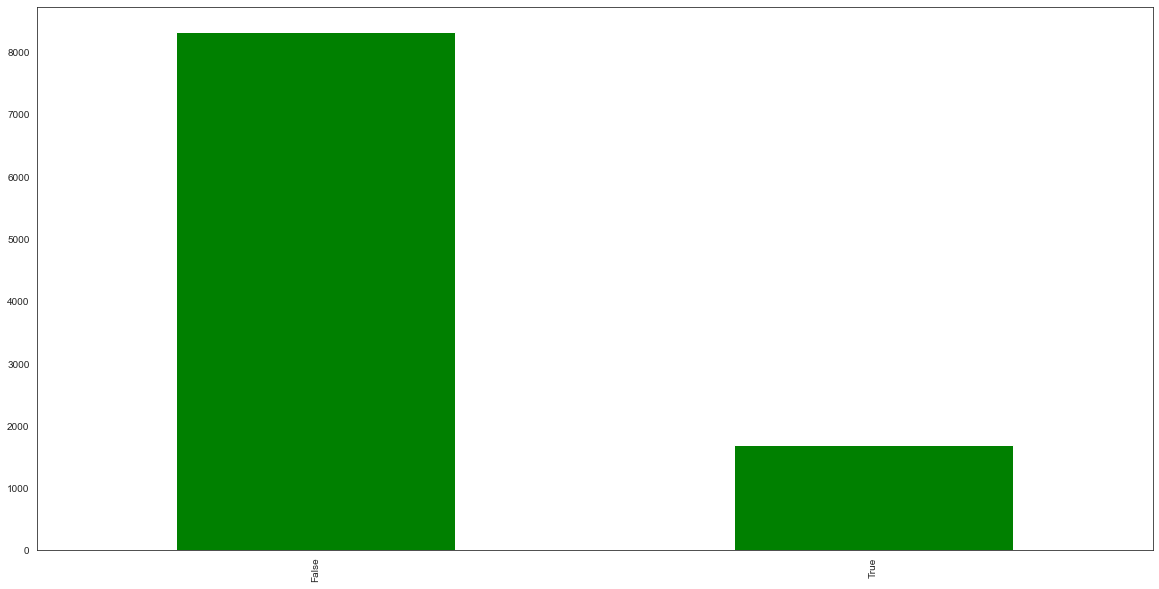

In [8]:
x= accounts['IS_FRAUD'].value_counts().sort_index()
x.plot(kind='bar', figsize=(15,10),color='green')

here we can say that more than 8315 transaction records did not generated any kind of alert while 1685 generated alert while getting transacted.
according this info we can say that the risk of going through a fraud is less.

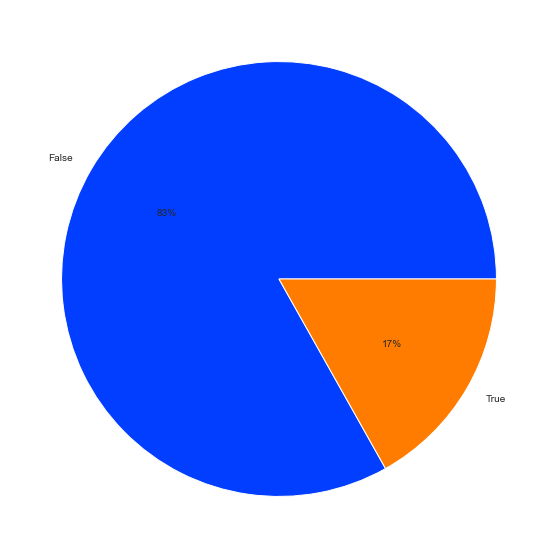

In [26]:
plt.figure(figsize=(20,10))
colors = sns.color_palette('bright')
labels = ['False', 'True']
plt.pie(x, labels=labels,colors = colors, autopct = '%0.0f%%')
plt.show()

there are only 17% chance that a transaction can encounter fraud rest 83% times its safe to transact amount from one account to another

### TX_BEHAVIOR analysis

In [10]:
y = accounts['TX_BEHAVIOR_ID'].value_counts().sort_index()

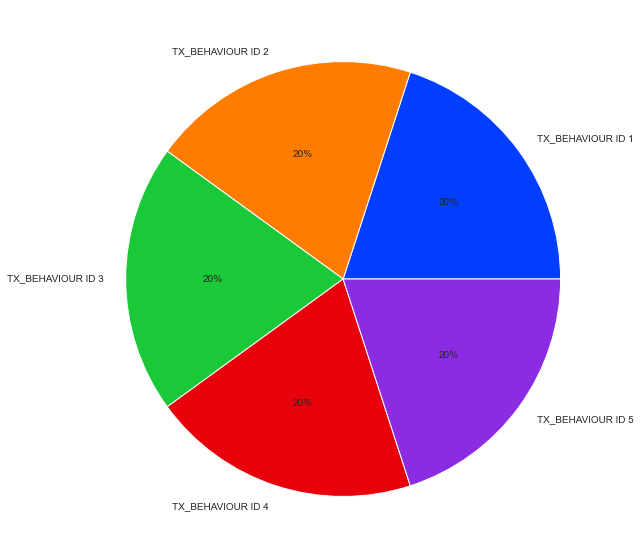

In [11]:
plt.figure(figsize=(20,10))
colors = sns.color_palette('bright')
labels = ['TX_BEHAVIOUR ID 1', 'TX_BEHAVIOUR ID 2','TX_BEHAVIOUR ID 3','TX_BEHAVIOUR ID 4','TX_BEHAVIOUR ID 5']
plt.pie(y, labels=labels,colors = colors, autopct = '%0.0f%%')
plt.show()

according to insight we gained we noticed that each TX_ID is effecting in on data in a equally contributed manner.
for over all data each TX_ID contributes 20%

### analyzing pattern between fraud (true) and not Fraud (false)

#### generated a line chart over init balance to Check in it balance is affecting the fraud or no fraud alert

<AxesSubplot:xlabel='IS_FRAUD,None'>

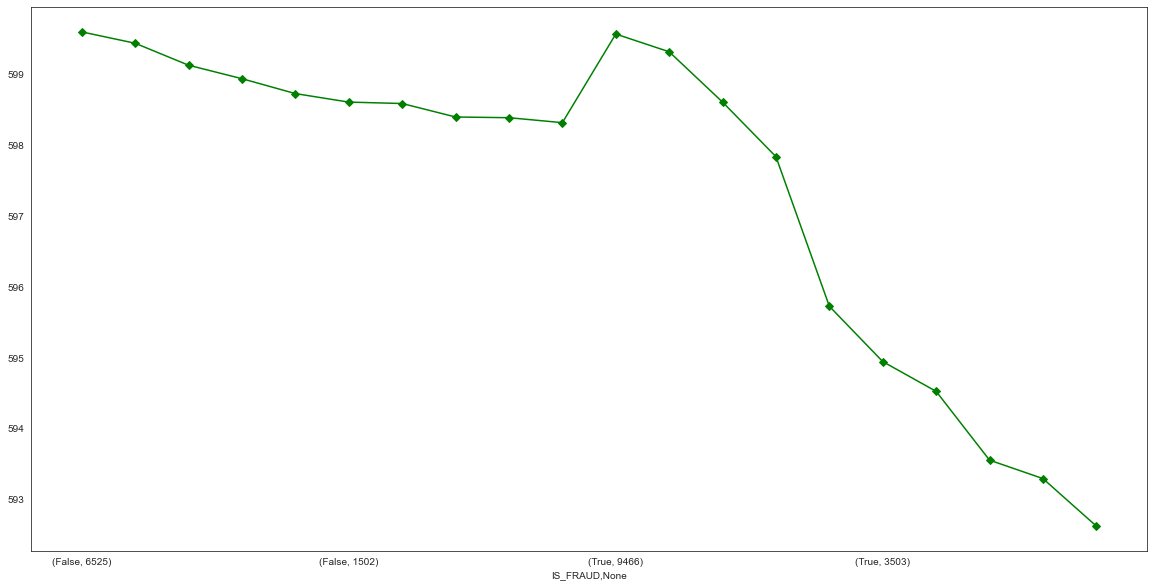

In [12]:
accounts.groupby('IS_FRAUD')['INIT_BALANCE'].nlargest(10).plot(kind='line', figsize=(20,10),color='green',marker='D')

those 20 points are plotted there from max in it balances those are top 10 of fraud alert is true and 10 from top alert is false.
as we can see over here only top 4 points are having the approx same range of in it balance kept in account.
where as fraud are more likely to happen when amount kept is less.

### what are the chances that if i keep less in it balance then I am more likely to encounter a fraud

<AxesSubplot:title={'center':'Bottom 5 init values '}, xlabel='IS_FRAUD,None'>

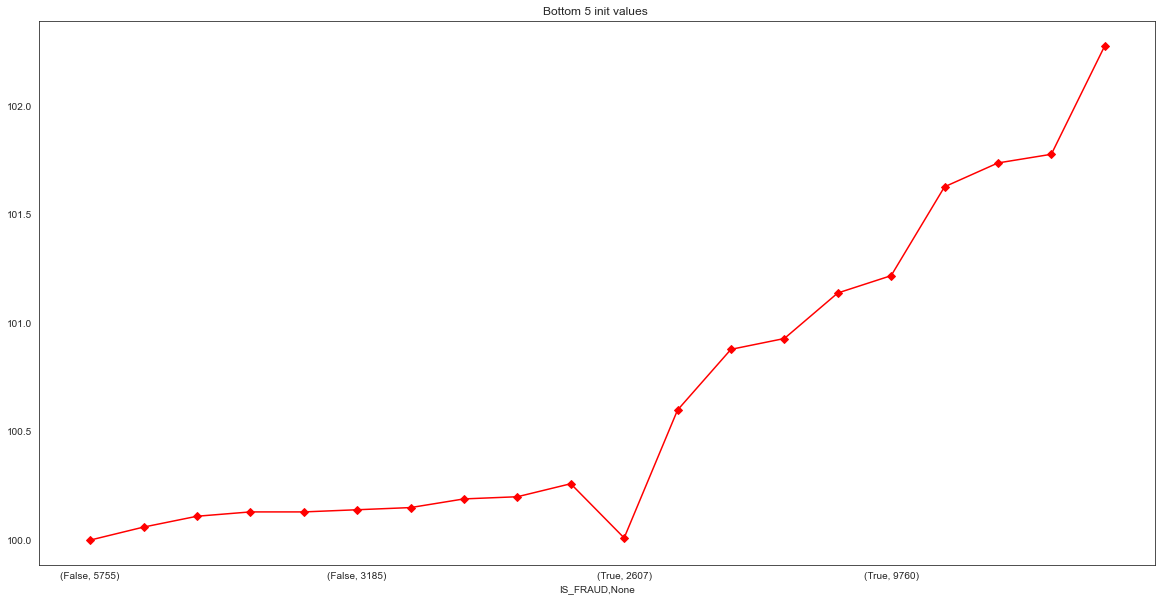

In [13]:
accounts.groupby('IS_FRAUD')['INIT_BALANCE'].nsmallest(10).plot(kind='line', figsize=(20,10),color='red',marker='D',title = "Bottom 5 init values ")

so we checked for min values of in it balances kept in the account and we came to know that as we go higher in init balance kept is the risk of getting fraud is also high.
we can conclude that the amount above 100 and less 500 is more likely to get a fraud.

### Checking pattern in top five largest values of INIT_BALANCE in each TX_BEHAVIOUR

checked behaviour of each tx_id between tx_id 3 4 peoples keep highest in it balance in the account

<AxesSubplot:title={'center':'top 5 init balances by tx_behaviour'}, xlabel='TX_BEHAVIOR_ID,None'>

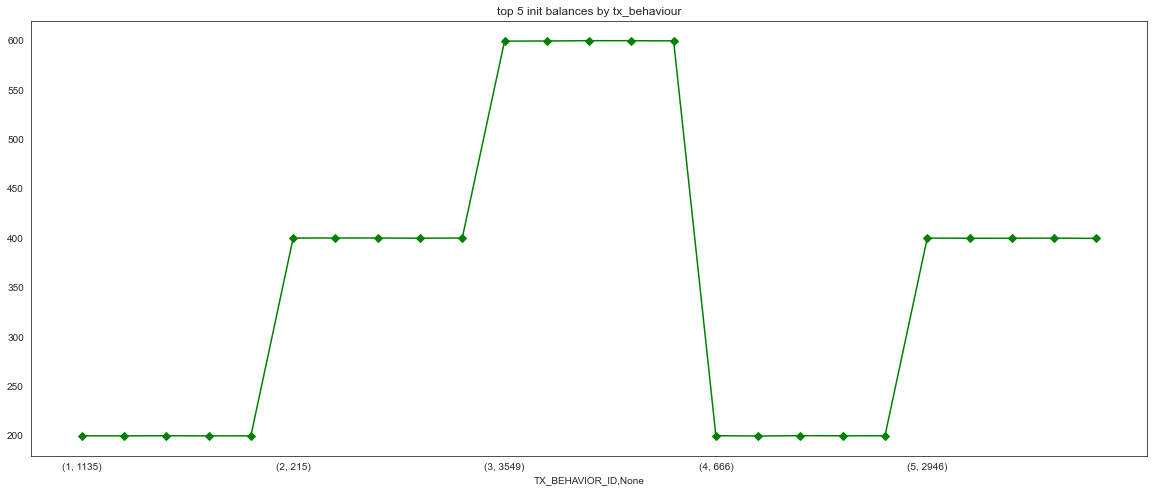

In [28]:
accounts.groupby(['TX_BEHAVIOR_ID'])['INIT_BALANCE'].nlargest(5).sort_index().plot(kind='line', figsize=(20,8), title = "top 5 init balances by tx_behaviour",color='green',marker='D')


### Checking pattern in bottom five largest values of INIT_BALANCE in each TX_BEHAVIOUR

in the bottom values same pattern is generated where as the amount kept reduced and no of peoples gets reduced in it

<AxesSubplot:title={'center':'Bottom 5 inti baln according to tx_behaviour'}, xlabel='TX_BEHAVIOR_ID,None'>

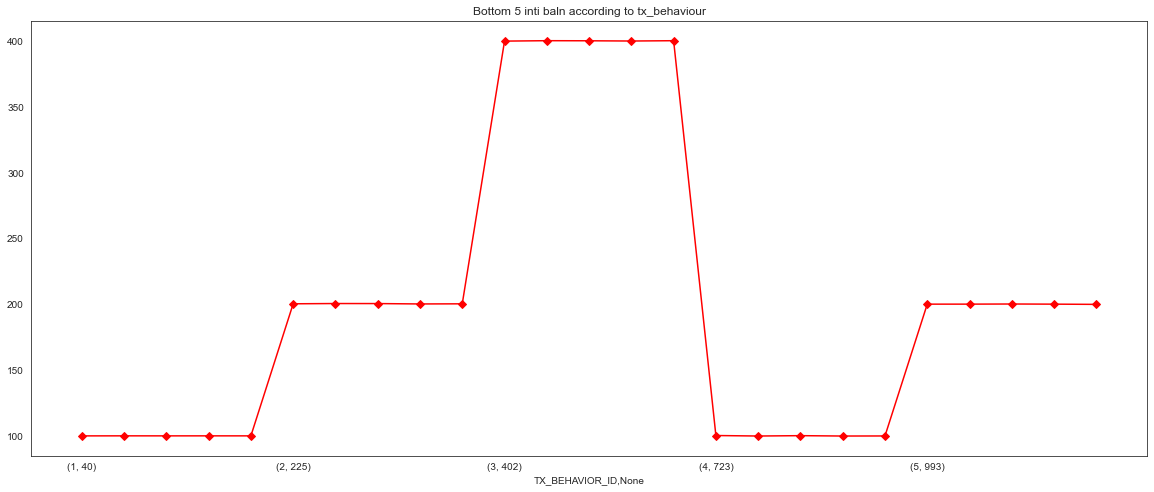

In [15]:
accounts.groupby('TX_BEHAVIOR_ID')['INIT_BALANCE'].nsmallest(5).sort_index().plot(kind='line', figsize=(20,8), title = "Bottom 5 inti baln according to tx_behaviour",color='red',marker='D')

there is no drastic change becouse of account type cause data provided is of single kind of account

<AxesSubplot:title={'center':'top 10 inti baln according account type '}, xlabel='ACCOUNT_TYPE,None'>

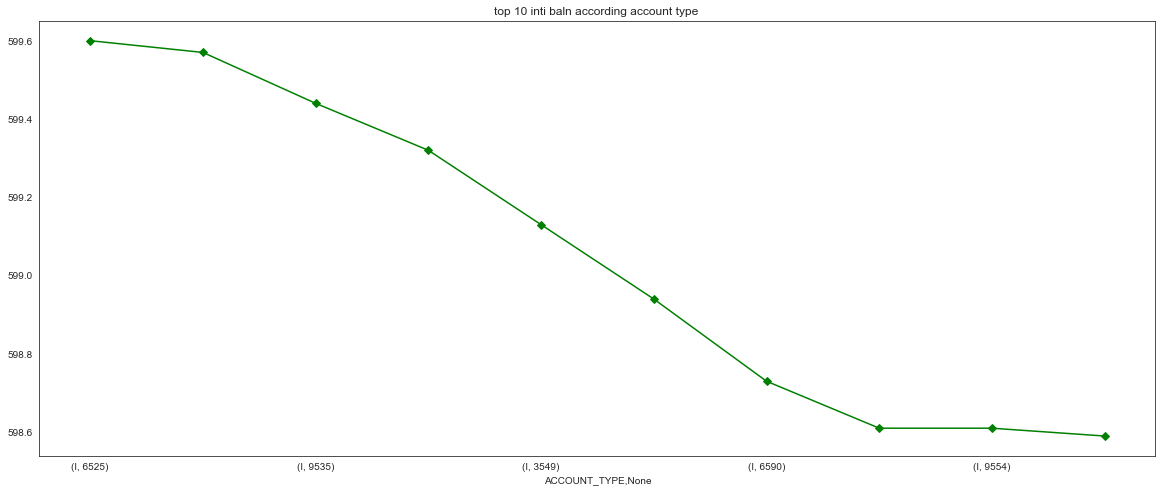

In [32]:
accounts.groupby('ACCOUNT_TYPE')['INIT_BALANCE'].nlargest(10).plot(kind='line', figsize=(20,8),marker='D',title = "top 10 inti baln according account type ",color='Green')

checking this for top in it balances
this is kind of interesting that in both conditions when an account go through fraud or it dose not still in both conditions the tx id 3 to 4 is at peek and they kind of posses same kind of pattern


<AxesSubplot:title={'center':'top 2 inti baln according account type and fraud  '}, xlabel='IS_FRAUD,TX_BEHAVIOR_ID,None'>

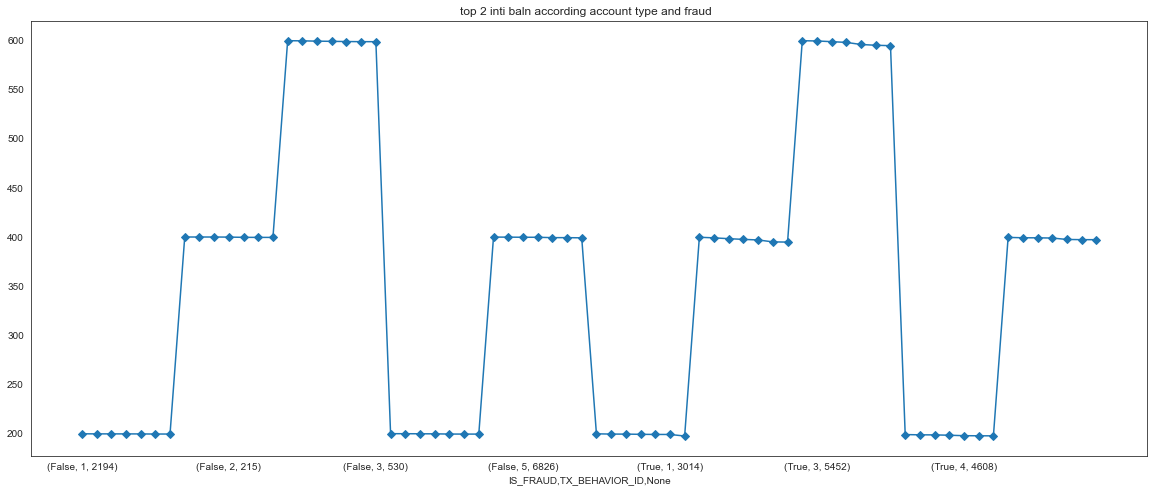

In [33]:
accounts.groupby(['IS_FRAUD','TX_BEHAVIOR_ID'])['INIT_BALANCE'].nlargest(7).plot(kind='line', figsize=(20,8),marker='D',title = "top 2 inti baln according account type and fraud  ")

while checking for bottom in in balances we get a different pattern from top values but get a symmetric pattern in between fraud and no fraud

<AxesSubplot:title={'center':'top 2 inti baln according account type and fraud  '}, xlabel='IS_FRAUD,TX_BEHAVIOR_ID,None'>

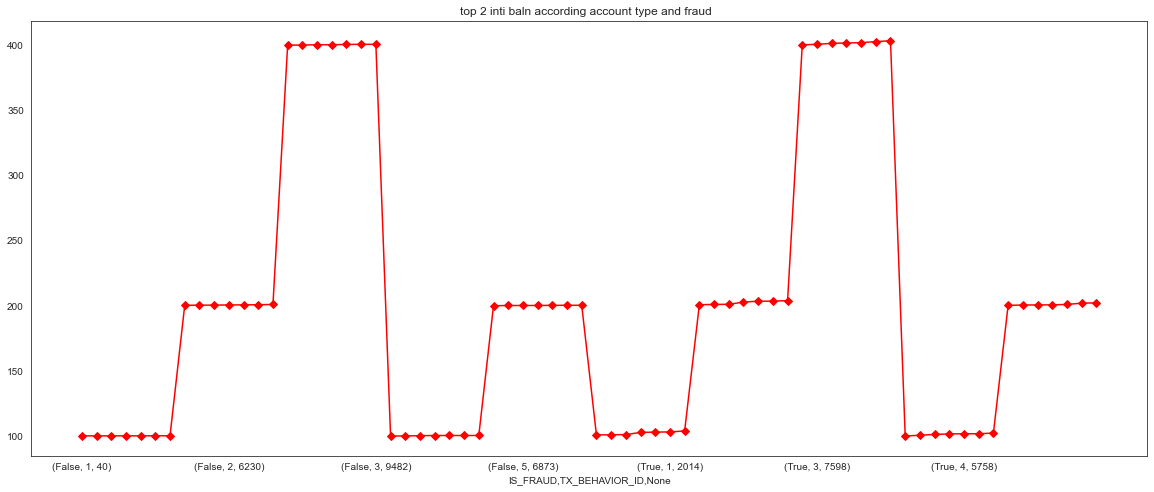

In [36]:
accounts.groupby(['IS_FRAUD','TX_BEHAVIOR_ID'])['INIT_BALANCE'].nsmallest(7).plot(kind='line', figsize=(20,8),marker='D',title = "top 2 inti baln according account type and fraud  ",color='red')